In [2]:
import os
os.environ['PATH'] = '/usr/local/cuda-11.6/bin:' + os.environ['PATH']
if 'notebooks' not in os.listdir(os.getcwd()):
    os.chdir('../') #changing directories so that output/gsplat_full etc. exists

from contextlib import redirect_stdout
from video_api import initialize_gaussians
from gaussian_renderer import render
import sys 
import torch 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#assumes that the model and dataset are in the same directory as this notebook
sys.argv = ['']
gaussians, background_color, sample_cameras, kinematic_chain = initialize_gaussians(model_path='ur5')

def display_render(image_tensor: torch.Tensor):
    im = image_tensor.detach().permute(1, 2, 0).cpu().numpy()
    im = (im * 255).astype(np.uint8)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

example_camera = sample_cameras[0]

Config file not found at
[Scene] Loading trained Gaussian model at iteration 48000
[Scene] Loading robot model from model path


/media/nvme-storage/robotics/drrobot/scene/gaussian_model.py:304: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lrs = torch.load(os.path.join(os.path.dirname(path), 'lrs.pth

['shoulder_pan_joint', 'shoulder_lift_joint', 'elbow_joint', 'wrist_1_joint', 'wrist_2_joint', 'wrist_3_joint']
[Cache] get_canonical_pose
torch.Size([3, 256, 256])


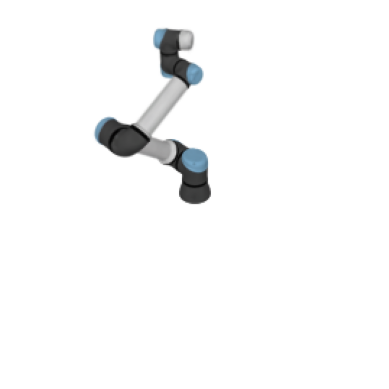

Sum of joint gradients: tensor(-3076.9607)
Sum of camera gradients: tensor(18227.4551)


In [3]:
print(kinematic_chain.get_joint_parameter_names())
n = len(kinematic_chain.get_joint_parameter_names())    
example_camera.joint_pose = torch.tensor([0.6] * n).requires_grad_(True)
example_camera.world_view_transform.requires_grad_(True)

frame = torch.clamp(render(example_camera, gaussians, background_color)['render'], 0, 1)
print(frame.shape)
display_render(frame)

frame.sum().backward()
print('Sum of joint gradients:', example_camera.joint_pose.grad.sum())
print('Sum of camera gradients:', example_camera.world_view_transform.grad.sum())